## Saving a Bears Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

Run this in Chrome It doesn't work on Safari on Mac, fastai widgets do not work - tested on kaggle.

In [1]:
# Make sure we've got the latest version of fastai:
#!pip install -Uqq fastai
!pip install duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.4 MB/s eta 0:00:00


In [2]:
!pip install --upgrade ipywidgets
!pip install --upgrade jupyterlab-manager

ERROR: Could not find a version that satisfies the requirement jupyterlab-manager (from versions: none)
ERROR: No matching distribution found for jupyterlab-manager


In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


First, import all the stuff we need from fastai:

In [4]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.widgets import *
import time
import shutil

In [5]:
def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [6]:
results = search_images('grizzly bear')

In [7]:
results[0]

'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

In [8]:
len(results)

173

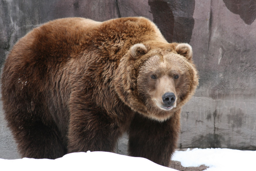

In [9]:
dest = 'grizzly.jpg'
download_url(results[0], dest, show_progress=True)
image = Image.open(dest)
image.to_thumb(256, 256)

In [10]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [11]:
# Deleting - this is optional, if you want to clear the previously downloaded data!
if path.exists():
    shutil.rmtree(path)

In [12]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        searching_for = f'{o} bear'
        print(searching_for)
        results = search_images(f'{o} bear')
        print(len(results))
        download_images(dest, urls=results)
        print(f"{searching_for}: download complete")
        time.sleep(5)
print("All files were downloaded")

grizzly bear
173
grizzly bear: download complete
black bear
176
black bear: download complete
teddy bear
200
teddy bear: download complete
All files were downloaded


In [13]:
!ls bears

black  grizzly	teddy


In [14]:
fns = get_image_files(path)
fns

(#517) [Path('bears/grizzly/1d49559a-c822-40db-bcbc-50348a8b50d4.jpg'),Path('bears/grizzly/53cd7478-96c5-4836-8044-0ee7fdae035a.jpg'),Path('bears/grizzly/e838a379-4bc4-41dc-953e-6bda3325c591.jpg'),Path('bears/grizzly/42daf577-bbe8-4639-993e-f4eb94400326.jpg'),Path('bears/grizzly/b4c96849-2103-4792-bddc-f0d866514303.jpg'),Path('bears/grizzly/84158bba-38bc-4054-a5ae-adbcfa668846.jpg'),Path('bears/grizzly/f104d4d3-9d36-40ee-ac11-c64c1ff00104.jpg'),Path('bears/grizzly/ca0b31e9-7480-4158-b725-6833275b043e.jpg'),Path('bears/grizzly/336a64f1-ee4d-4a47-b15b-337c198fcd16.JPG'),Path('bears/grizzly/8a68dbde-6e4d-45b2-bc79-53faee8414d3.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#40) [Path('bears/grizzly/336a64f1-ee4d-4a47-b15b-337c198fcd16.JPG'),Path('bears/grizzly/6bc90036-a42e-4c9a-b936-199072ebfe73.jpg'),Path('bears/grizzly/ef070926-da36-4482-8758-897aa73815a6.jpg'),Path('bears/grizzly/8d689216-139f-4911-a4c8-9271be05f162.jpg'),Path('bears/grizzly/45b4fdd1-25c5-4399-8c96-8ee3b7ff7e8e.jpg'),Path('bears/grizzly/11280071-39e2-4221-8cfa-dc56c36e473c.jpg'),Path('bears/grizzly/84441b05-a35d-4d8d-9598-a0e2bf83c167.jpg'),Path('bears/grizzly/0ba4b612-ce53-4a99-a714-3d401cca9b12.JPG'),Path('bears/grizzly/28de6b26-d91a-419d-af67-2c9357b4b0a0.jpg'),Path('bears/grizzly/1b1eac2a-9db7-4243-8665-3a60e253a5d3.jpg')...]

In [16]:
failed.map(Path.unlink)

(#40) [None,None,None,None,None,None,None,None,None,None...]

In [17]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

If you're re-running after cleaning the data using the widget (below), start from here, to keep the current dataset splits.

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


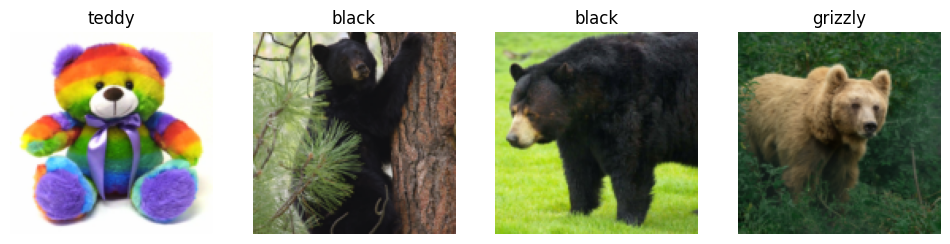

In [18]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

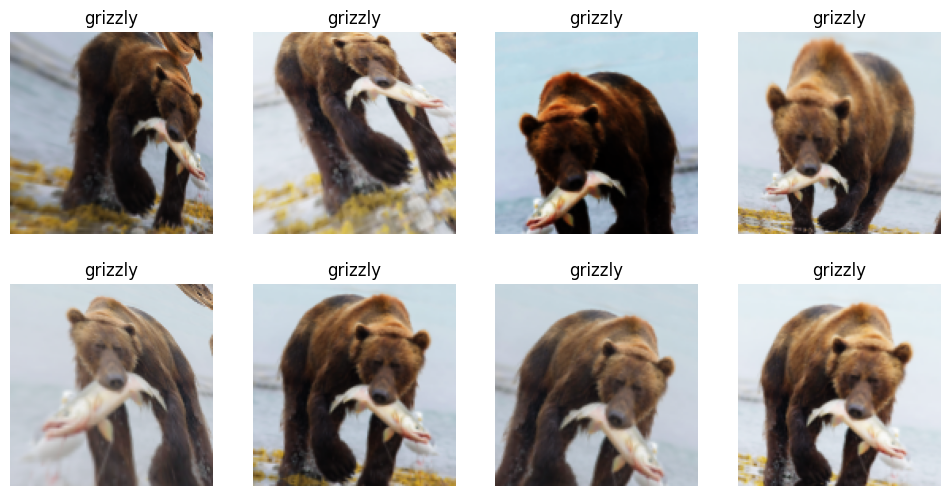

In [19]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 224MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.216644,0.076418,0.042105,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.186809,0.054253,0.021053,00:12
1,0.152035,0.055088,0.010526,00:13
2,0.119359,0.027667,0.021053,00:12
3,0.104467,0.017492,0.010526,00:13


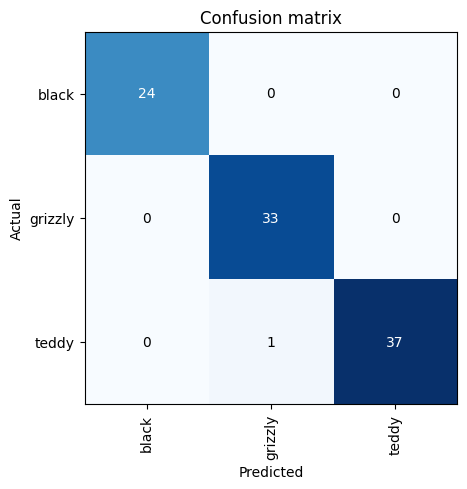

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

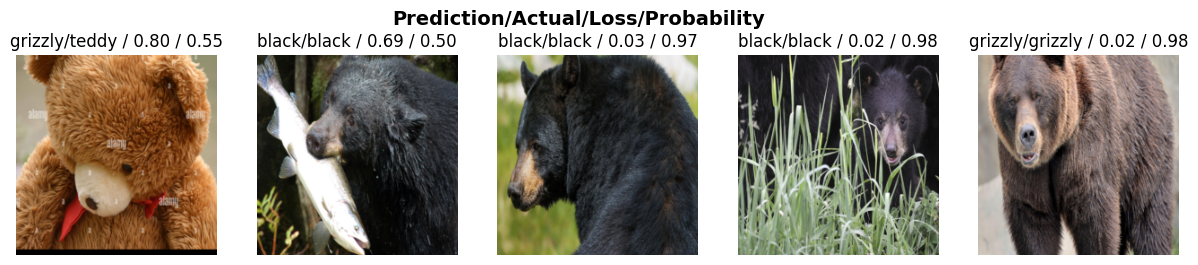

In [23]:
interp.plot_top_losses(5, nrows=1)

Widgets are not working in Kaggle in Safari - run this notebook in Chrome.
Once you changed/deleted files in one category, execute the code that deletes/changes (below). The widget does not remember changes made
in a category, i.e. you cannot make changes inside a category and change it, they will be lost.

In [24]:
cleaner = ImageClassifierCleaner(learn, max_n=10)
cleaner

Deleting and changing categories

In [25]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Re-run the training if you have changed the data.

In [26]:
learn.export("bears.pkl")

In [27]:
!ls

__notebook__.ipynb  bears  bears.pkl  grizzly.jpg


In [28]:
learn_inf = load_learner('bears.pkl')

In [29]:
learn_inf.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([2.2972e-06, 1.0000e+00, 5.7867e-08]))

The categories that the model is able to work with:

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

# Creating a simple web app in the notebook using widgets

In [31]:
btn_upload = widgets.FileUpload()
output_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.value[0].content.tobytes())
    output_pl.clear_output()
    with output_pl: display(img.to_thumb(128, 128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}, probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, output_pl, lbl_pred])